# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q={}&appid={}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url.format(city, weather_api_key)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        
        city_lng =city_weather["coord"]["lon"]
       
        city_max_temp = city_weather["main"]["temp_max"]-273.15
        
        city_humidity = city_weather["main"]["humidity"]
       
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
      
        city_date = city_weather["dt"]
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        print("Saving ", city)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Saving  dikson
Processing Record 2 of Set 1 | mossendjo
Saving  mossendjo
Processing Record 3 of Set 1 | port augusta
Saving  port augusta
Processing Record 4 of Set 1 | arraial do cabo
Saving  arraial do cabo
Processing Record 5 of Set 1 | deputatskiy
Saving  deputatskiy
Processing Record 6 of Set 1 | pevek
Saving  pevek
Processing Record 7 of Set 1 | atuona
Saving  atuona
Processing Record 8 of Set 1 | ushuaia
Saving  ushuaia
Processing Record 9 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1 | terryville
Saving  terryville
Processing Record 11 of Set 1 | tiksi
Saving  tiksi
Processing Record 12 of Set 1 | tabulbah
City not found. Skipping...
Processing Record 13 of Set 1 | east london
Saving  east london
Processing Record 14 of Set 1 | qaanaaq
Saving  qaanaaq
Processing Record 15 of Set 1 | yerbogachen
Saving  yerbogachen
Processing Record 16 of Set 1 |

In [31]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(data=city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,73.5069,80.5464,-32.10,99,39,1.32,RU,1680973136
1,mossendjo,-2.9506,12.7261,23.90,90,100,0.87,CG,1680973136
2,port augusta,-32.5000,137.7667,15.52,69,12,4.17,AU,1680973136
3,arraial do cabo,-22.9661,-42.0278,24.98,100,100,2.57,BR,1680973136
4,deputatskiy,69.3000,139.9000,-28.39,100,100,1.04,RU,1680973136


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dikson,73.5069,80.5464,-32.10,99,39,1.32,RU,1680973136
1,mossendjo,-2.9506,12.7261,23.90,90,100,0.87,CG,1680973136
2,port augusta,-32.5000,137.7667,15.52,69,12,4.17,AU,1680973136
3,arraial do cabo,-22.9661,-42.0278,24.98,100,100,2.57,BR,1680973136
4,deputatskiy,69.3000,139.9000,-28.39,100,100,1.04,RU,1680973136


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

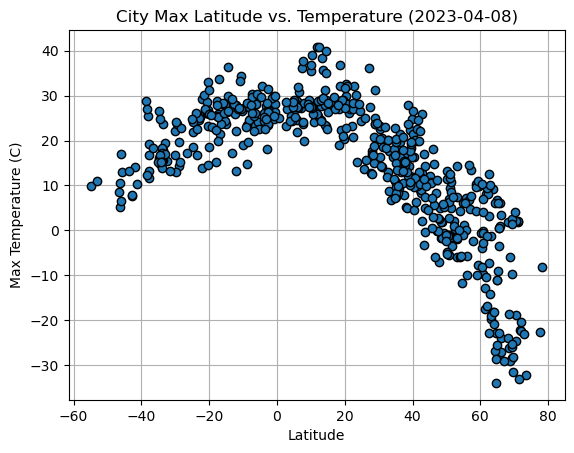

In [35]:
# Build scatter plot for latitude vs. temperature
plt.figure()
plt.plot(city_data_df["Lat"], city_data_df["Max Temp"], "o", mec="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-04-08)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

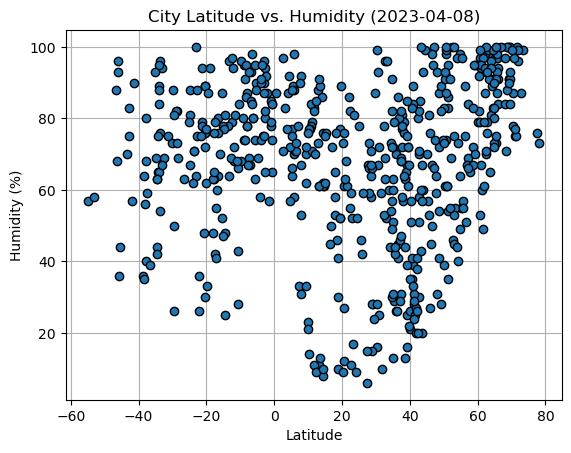

In [36]:
# Build the scatter plots for latitude vs. humidity
plt.figure()
plt.plot(city_data_df["Lat"], city_data_df["Humidity"], "o", mec="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-04-08)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

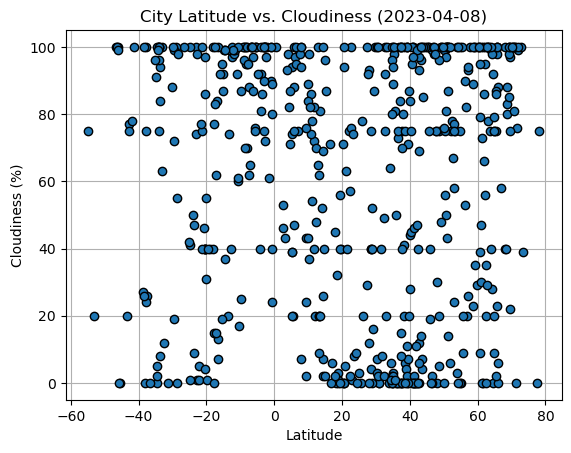

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure()
plt.plot(city_data_df["Lat"], city_data_df["Cloudiness"], "o", mec="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-04-08)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

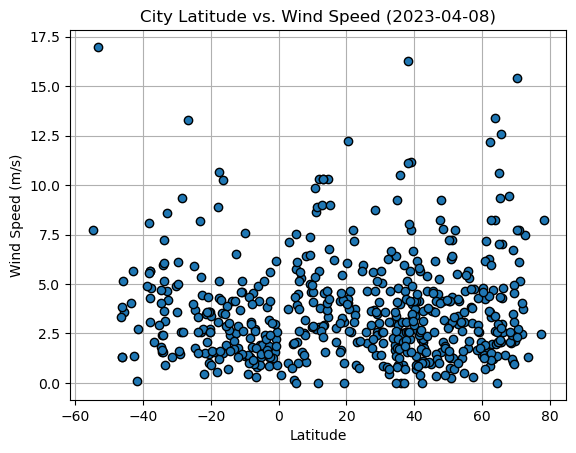

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.figure()
plt.plot(city_data_df["Lat"], city_data_df["Wind Speed"], "o", mec="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-04-08)")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
def get_linregress(df, xcol, ycol): 
    x=df[xcol]
    y=df[ycol]
    result=linregress(x,y)
    slope=result.slope
    intercept=result.intercept
    
    r=result.rvalue
    print("The r-value is: ", r**2)
    plt.figure()
    plt.plot(x,y,"o")
    label= "y = {:.2f}x + {:.2f}".format(slope, intercept)
    plt.plot(x, slope *x + intercept , "r-", label=label)
    plt.legend(fontsize=12, loc= "best", framealpha=0.5)
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.show()
    


In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dikson,73.5069,80.5464,-32.10,99,39,1.32,RU,1680973136
4,deputatskiy,69.3000,139.9000,-28.39,100,100,1.04,RU,1680973136
5,pevek,69.7008,170.3133,-31.43,100,97,2.12,RU,1680973137
8,terryville,40.9090,-73.0651,9.99,39,100,6.17,US,1680973137
9,tiksi,71.6872,128.8694,-22.12,100,76,2.46,RU,1680973137


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mossendjo,-2.9506,12.7261,23.90,90,100,0.87,CG,1680973136
2,port augusta,-32.5000,137.7667,15.52,69,12,4.17,AU,1680973136
3,arraial do cabo,-22.9661,-42.0278,24.98,100,100,2.57,BR,1680973136
6,atuona,-9.8000,-139.0333,27.21,68,25,7.59,PF,1680973137
7,ushuaia,-54.8000,-68.3000,9.81,57,75,7.72,AR,1680973137


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:  0.7284620301637639


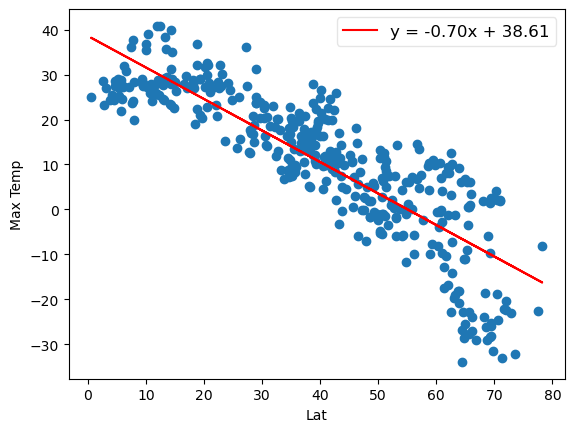

In [46]:
# Linear regression on Northern Hemisphere
get_linregress(northern_hemi_df, "Lat","Max Temp")

The r-value is:  0.47601073019070966


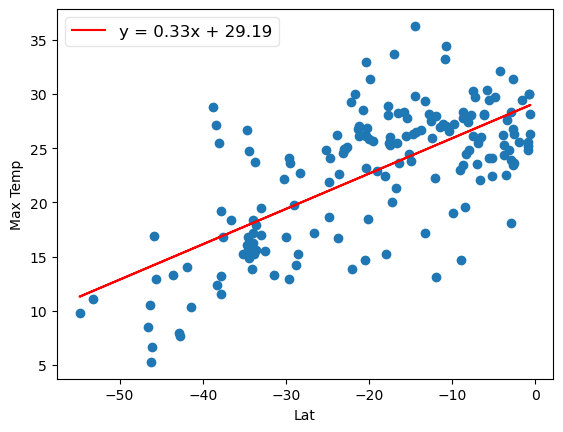

In [47]:
# Linear regression on Southern Hemisphere
get_linregress(southern_hemi_df, "Lat","Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is:  0.1113422033503419


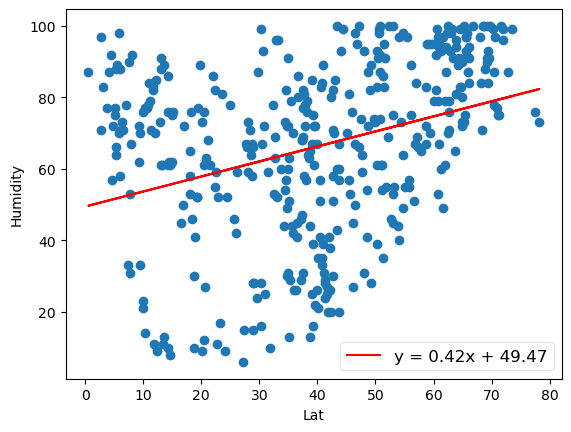

In [48]:
# Northern Hemisphere
get_linregress(northern_hemi_df, "Lat","Humidity")

The r-value is:  0.06545220336242037


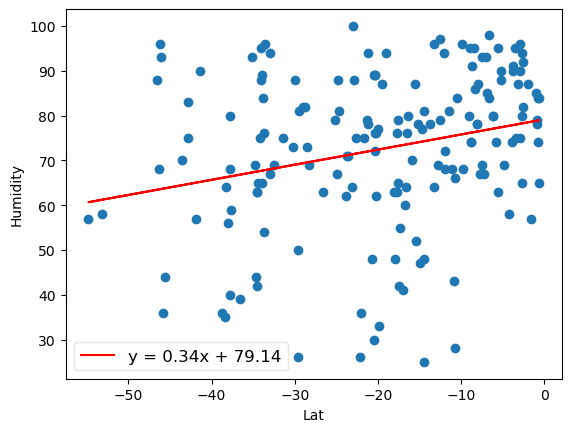

In [49]:
# Southern Hemisphere
get_linregress(southern_hemi_df, "Lat","Humidity")

For both northern and southern hemisepheres , the greater the latitude, the higher the humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:  0.02134570363837663


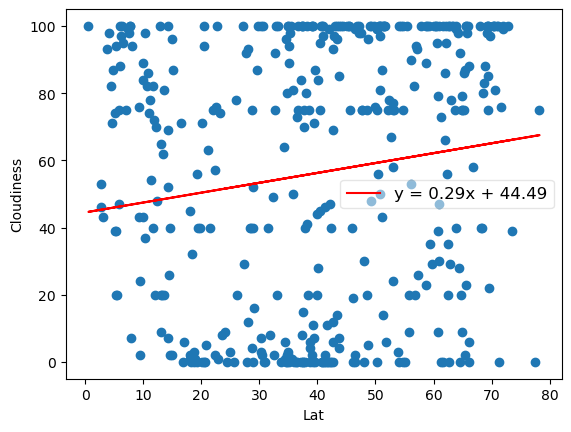

In [50]:
# Northern Hemisphere
get_linregress(northern_hemi_df, "Lat","Cloudiness")

The r-value is:  0.07345029218824582


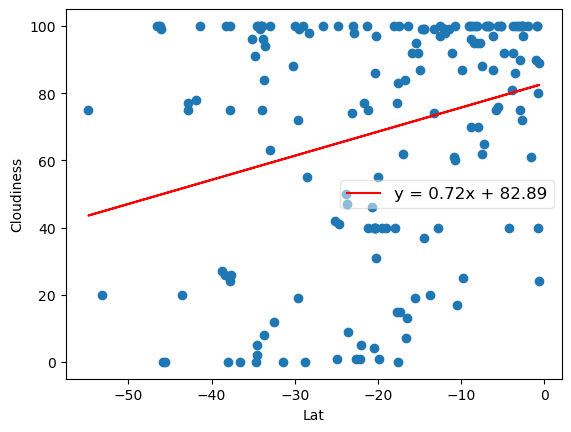

In [52]:
# Southern Hemisphere
get_linregress(southern_hemi_df, "Lat","Cloudiness")

In both the northern and southern hemispheres, there is no relationship between latitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:  0.0004389867968457942


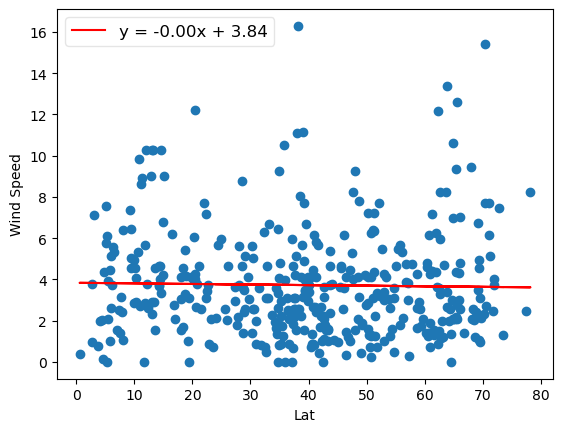

In [53]:
# Northern Hemisphere
get_linregress(northern_hemi_df, "Lat","Wind Speed")

The r-value is:  0.09957068966922701


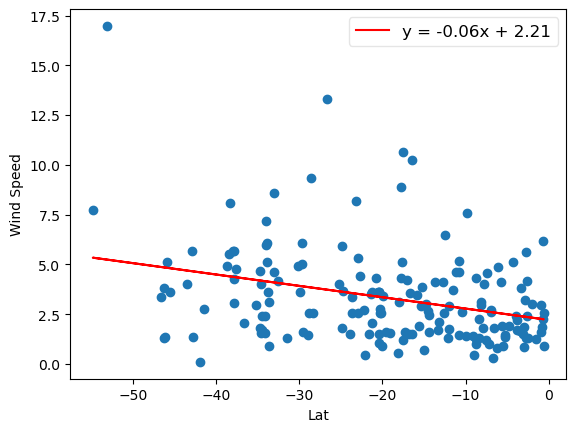

In [54]:
# Southern Hemisphere
get_linregress(southern_hemi_df, "Lat","Wind Speed")

There is no relationship between windspeed and latitude in both hemispheres. 